In [1]:
from manim import *
import numpy as np

config.verbosity = "CRITICAL"

Manim Community v0.9.0

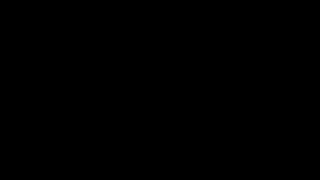

In [2]:
%%manim -i -qh -r 320,180 -o num_lines ExNumber

class ExNumber(Scene):
    def construct(self):
        tex = Tex(r"22,446!", color=RED).scale(4)
        self.play(Write(tex), run_time=3)
        self.wait(2)

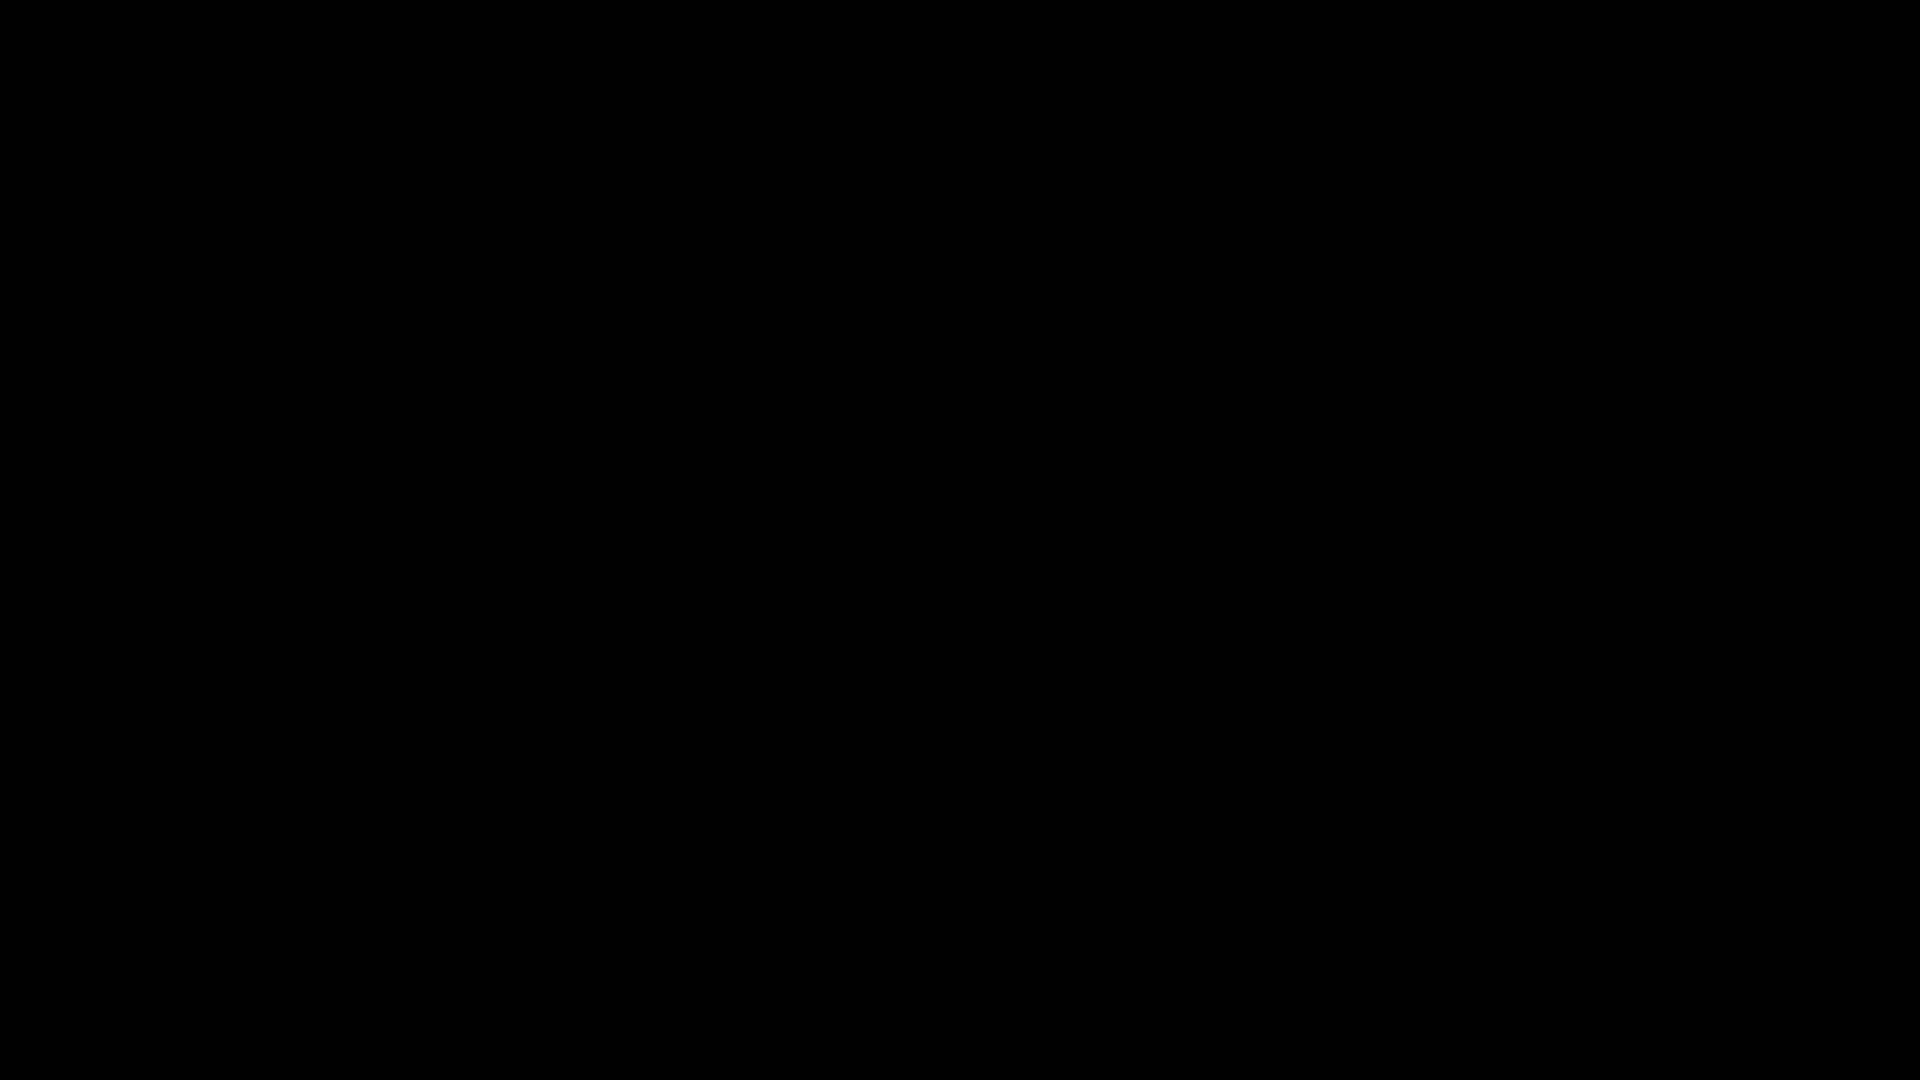

In [3]:
%%manim -i -qh -o my_first MyFirstAnimation

class MyFirstAnimation(Scene):
    def construct(self):
        # Create basic mobjects
        star = Star(n=5, fill_color=RED, stroke_color=BLUE)
        circle = Circle(fill_color=DARK_BLUE, fill_opacity=0.8, stroke_color=BLUE)

        # Animate Fade in of the star that takes 2 seconds
        self.play(FadeIn(star, run_time=2))
        # Wait for a second
        self.wait()
        # Transform star into a circle
        self.play(Transform(star, circle))
        self.wait(0.5)
        # Remove the circle by fading it out
        self.play(FadeOut(circle))

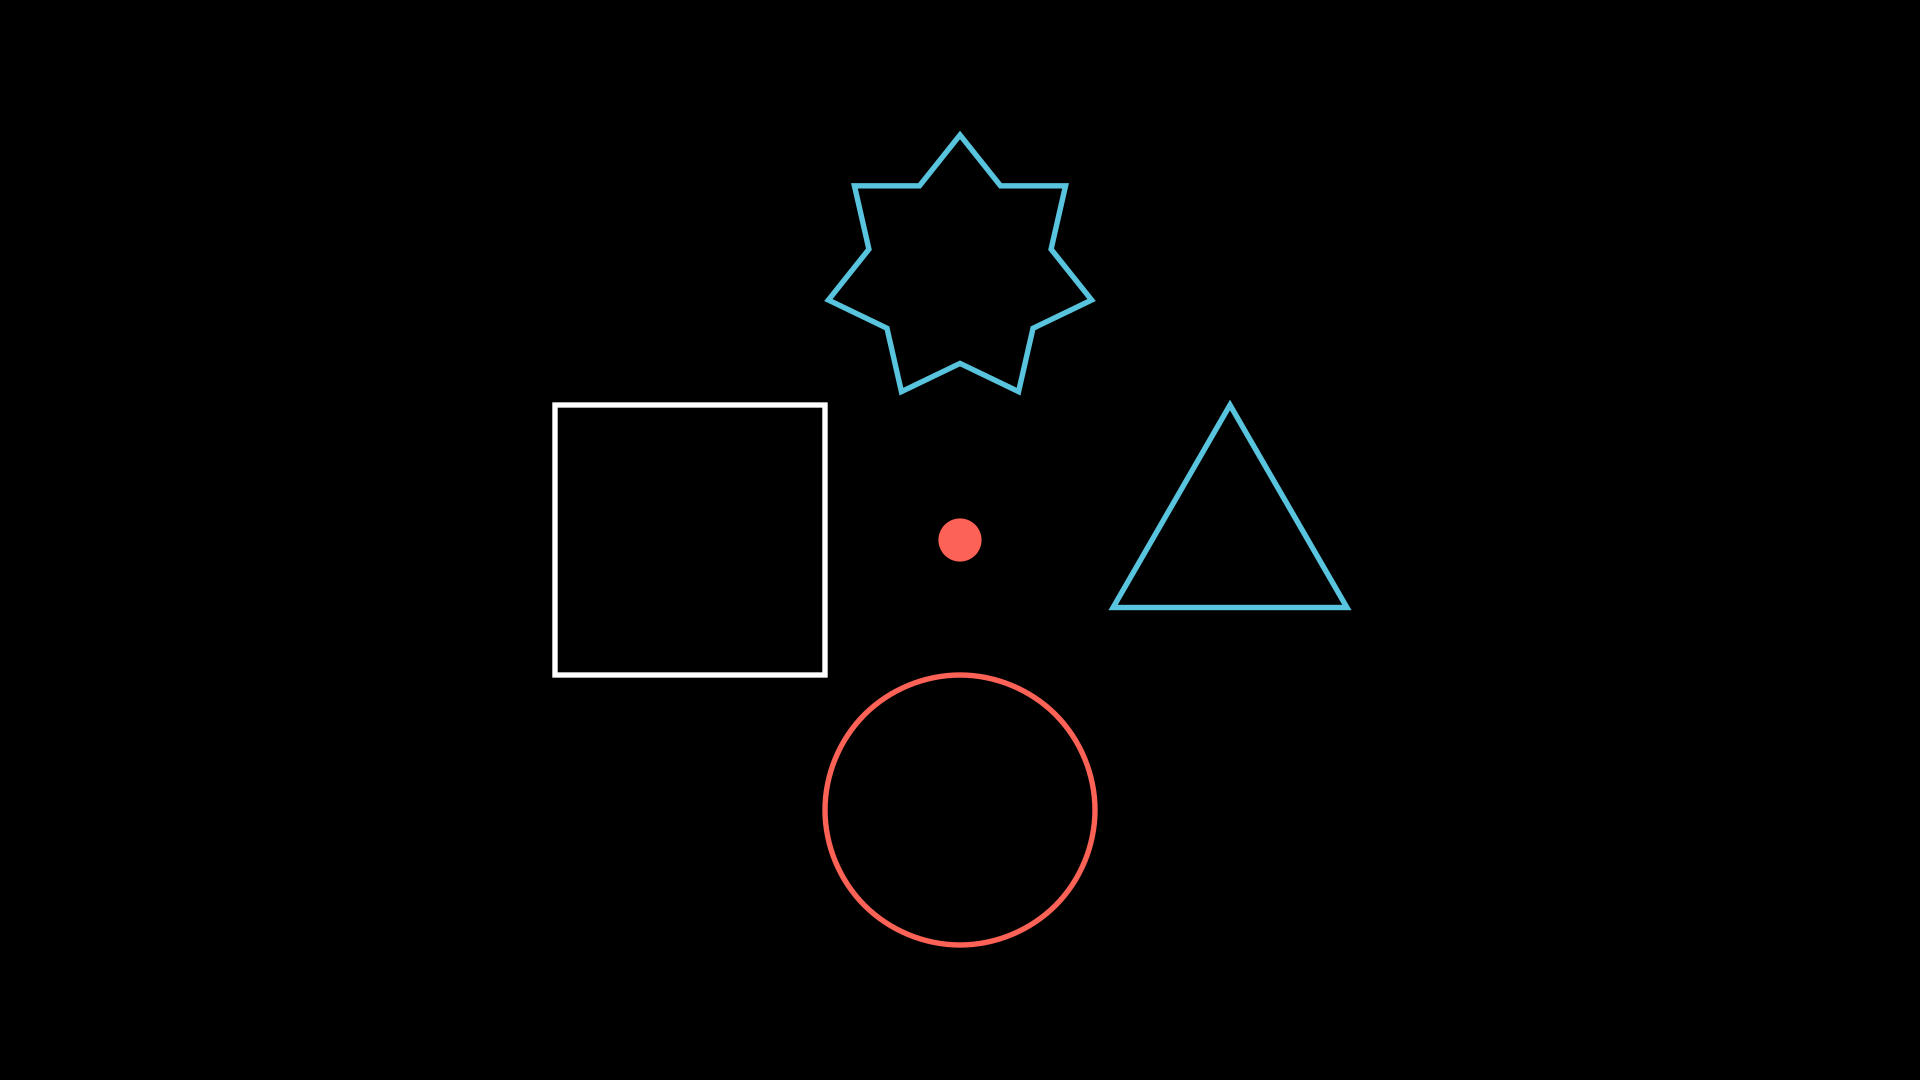

In [4]:
%%manim -i -qh -o coords ShowCoordinates


class ShowCoordinates(Scene):
    def construct(self):
        # place a dot at the origin
        dot = Dot(radius=0.16, color=RED)
        # Add the dot to the screen
        self.add(dot)
        # Create 4 different mobjects and shift them from the origin
        square = Square().shift(2 * LEFT)
        triangle = Triangle().shift(2 * RIGHT)
        circle = Circle().shift(2 * DOWN)
        star = Star(n=7).shift(2 * UP)
        # Add all to the screen
        self.add(square, triangle, circle, star)


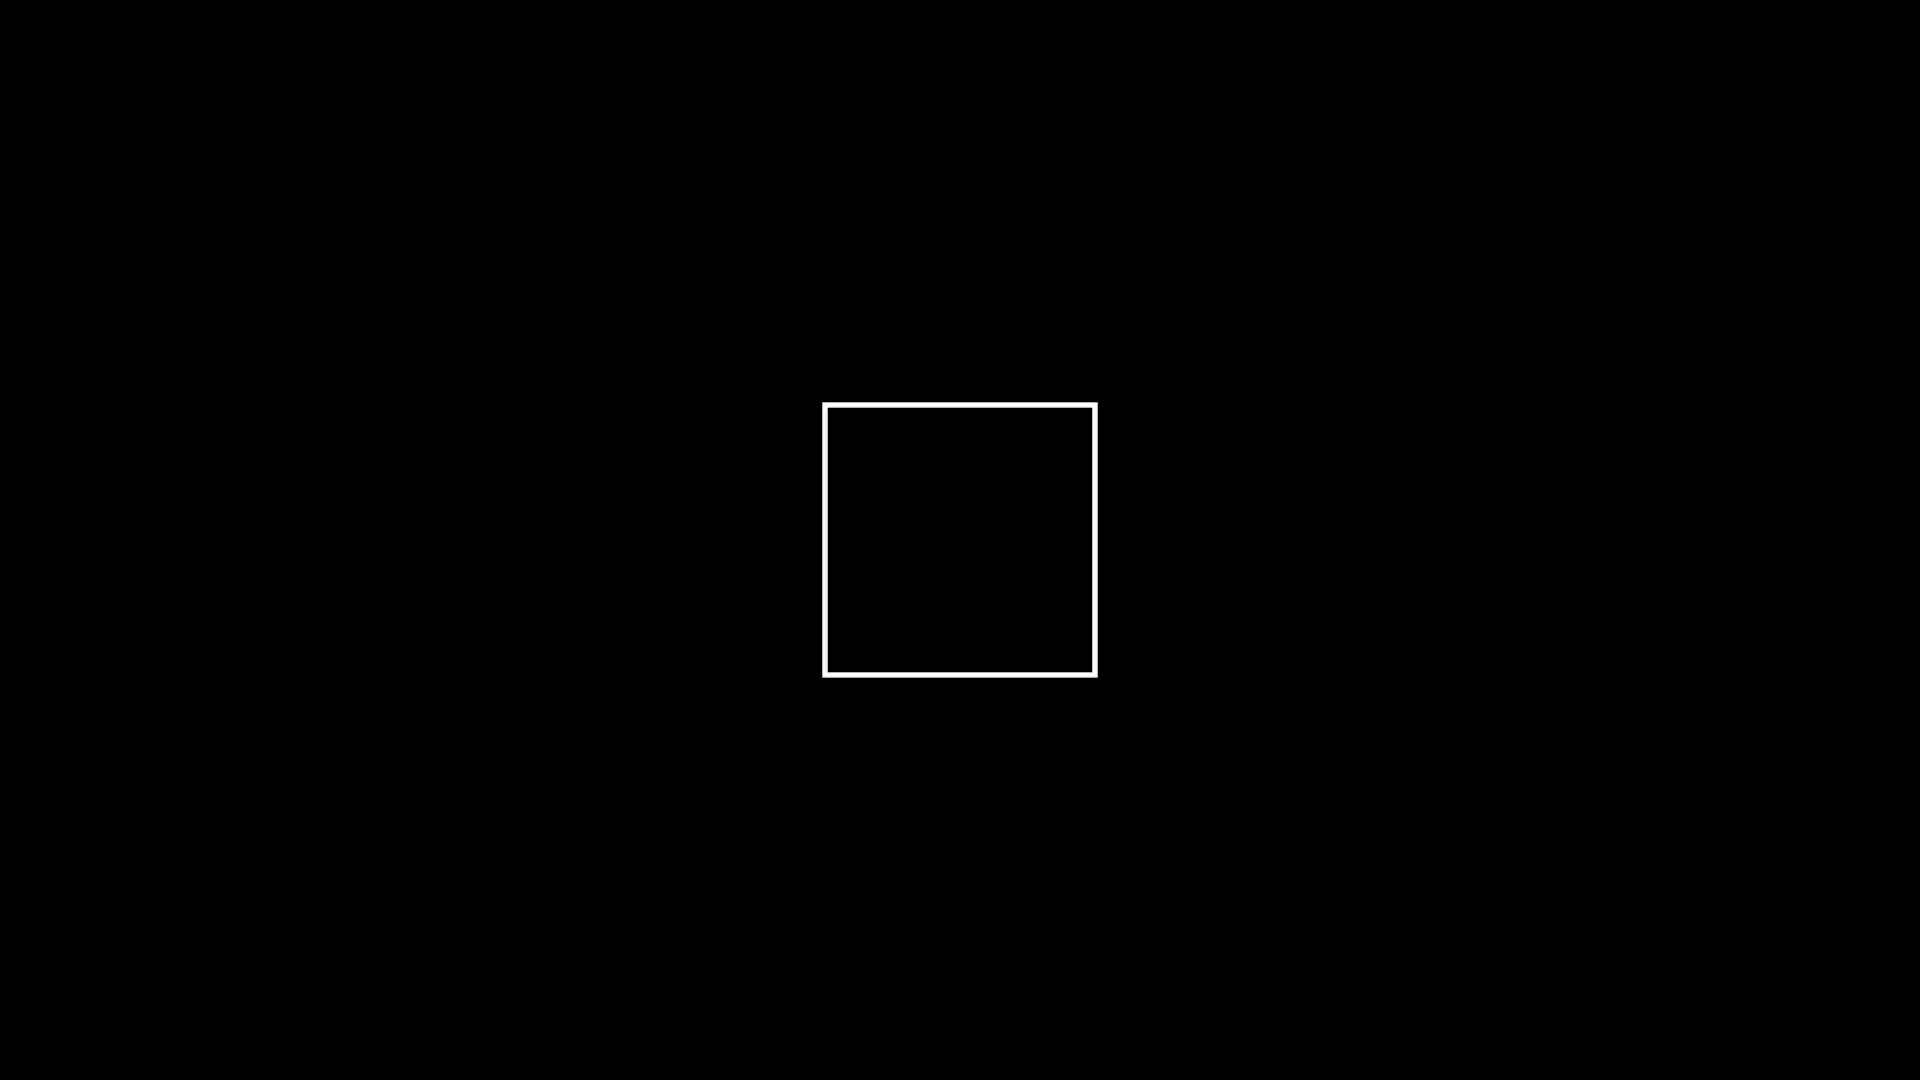

In [5]:
%%manim -i -qh -o coords2 ShowCoords2


class ShowCoords2(Scene):
    def construct(self):
        # place a dot at the origin
        dot = Dot(radius=0.16, color=RED)  # twice the usual size

        # Create 4 different mobjects and animate their shift
        new_locations = [2 * UL, 2 * UR, 2 * DL, 2 * DR]
        mobjects = [Square(), Triangle(), Circle(), Star(n=7)]

        for loc, mob in zip(new_locations, mobjects):
            self.play(mob.animate.shift(loc))

        # Add the dot with Create animation
        self.play(Create(dot))

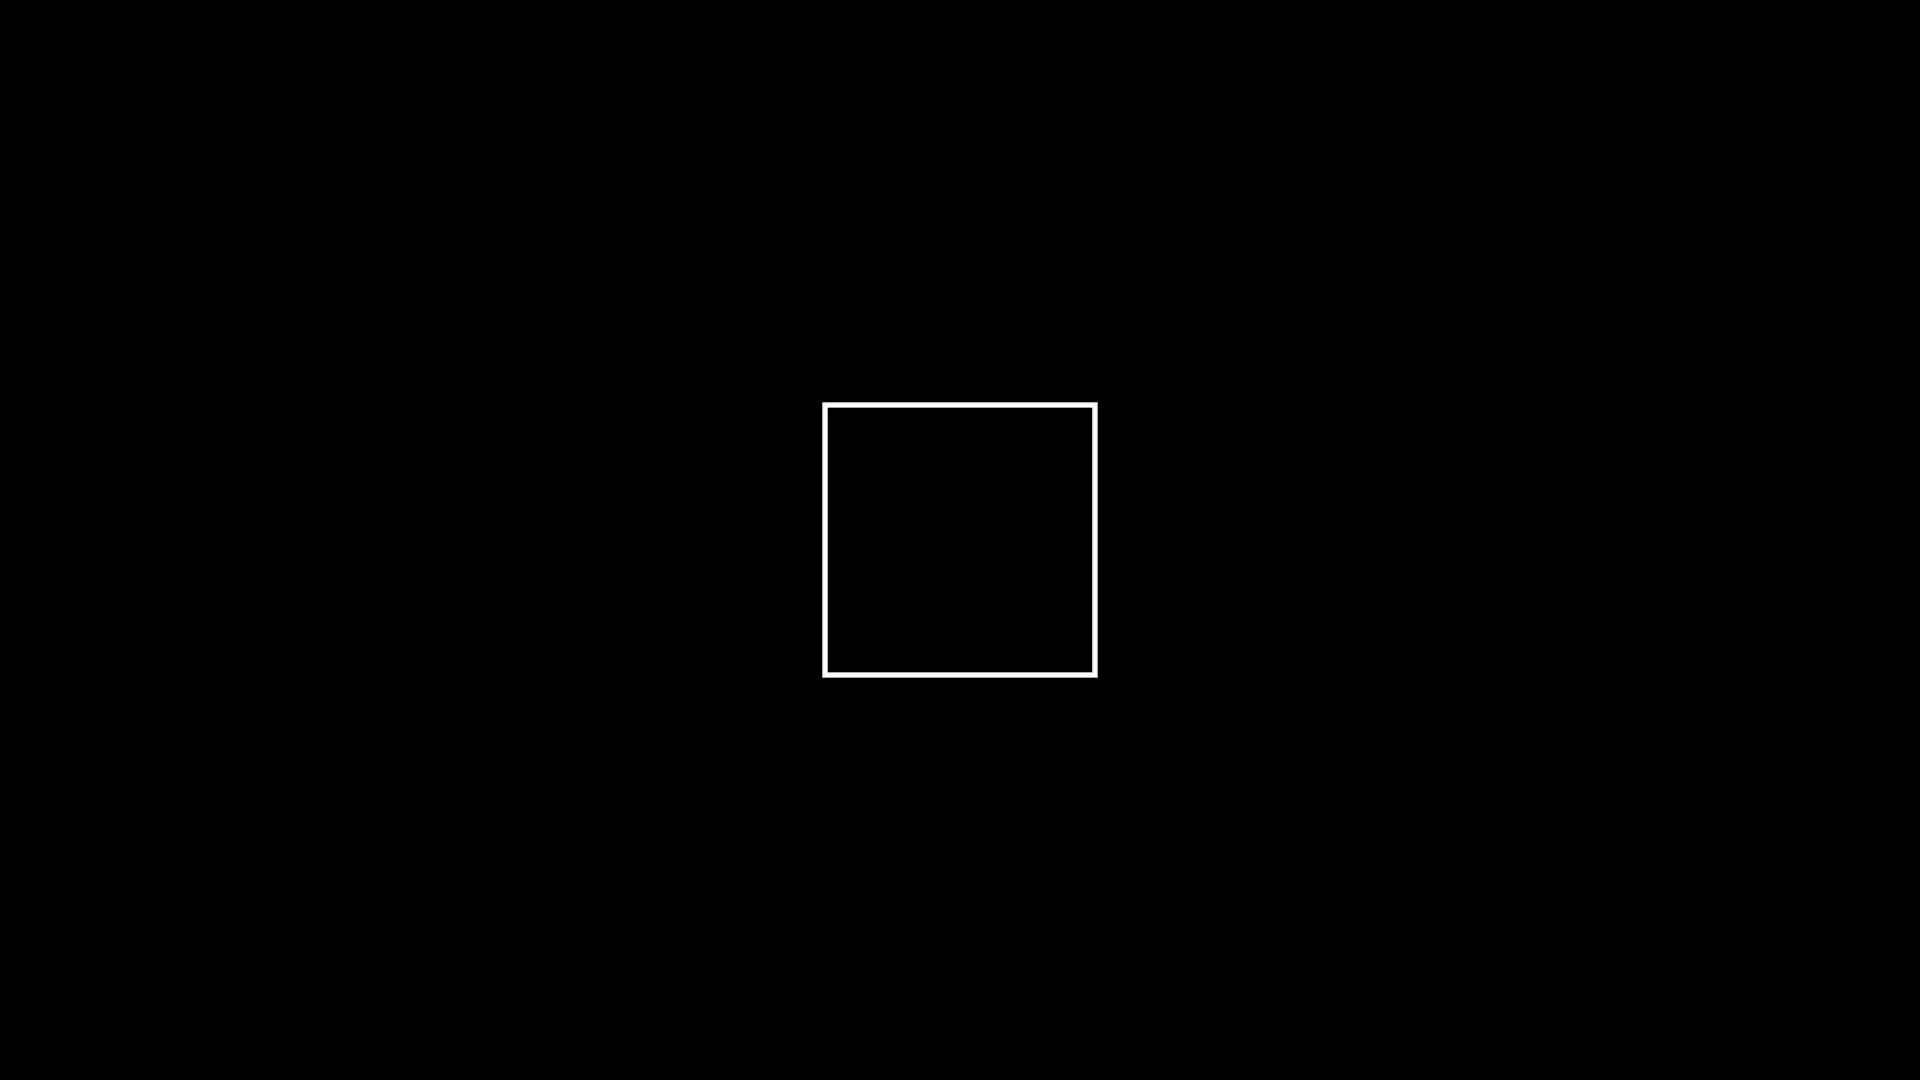

In [6]:
%%manim -i -qh -o attribs AnimateAttribs


class AnimateAttribs(Scene):
    def construct(self):
        # Create a simple square
        square = Square(side_length=2)

        # Scale to twice the size
        self.play(square.animate.scale(2))
        # Rotate
        self.play(square.animate.rotate(PI / 3))  # Rotate 60 degrees
        # Change the fill color and opacity
        self.play(square.animate.set_fill(RED, opacity=0.7))
        self.wait(2)

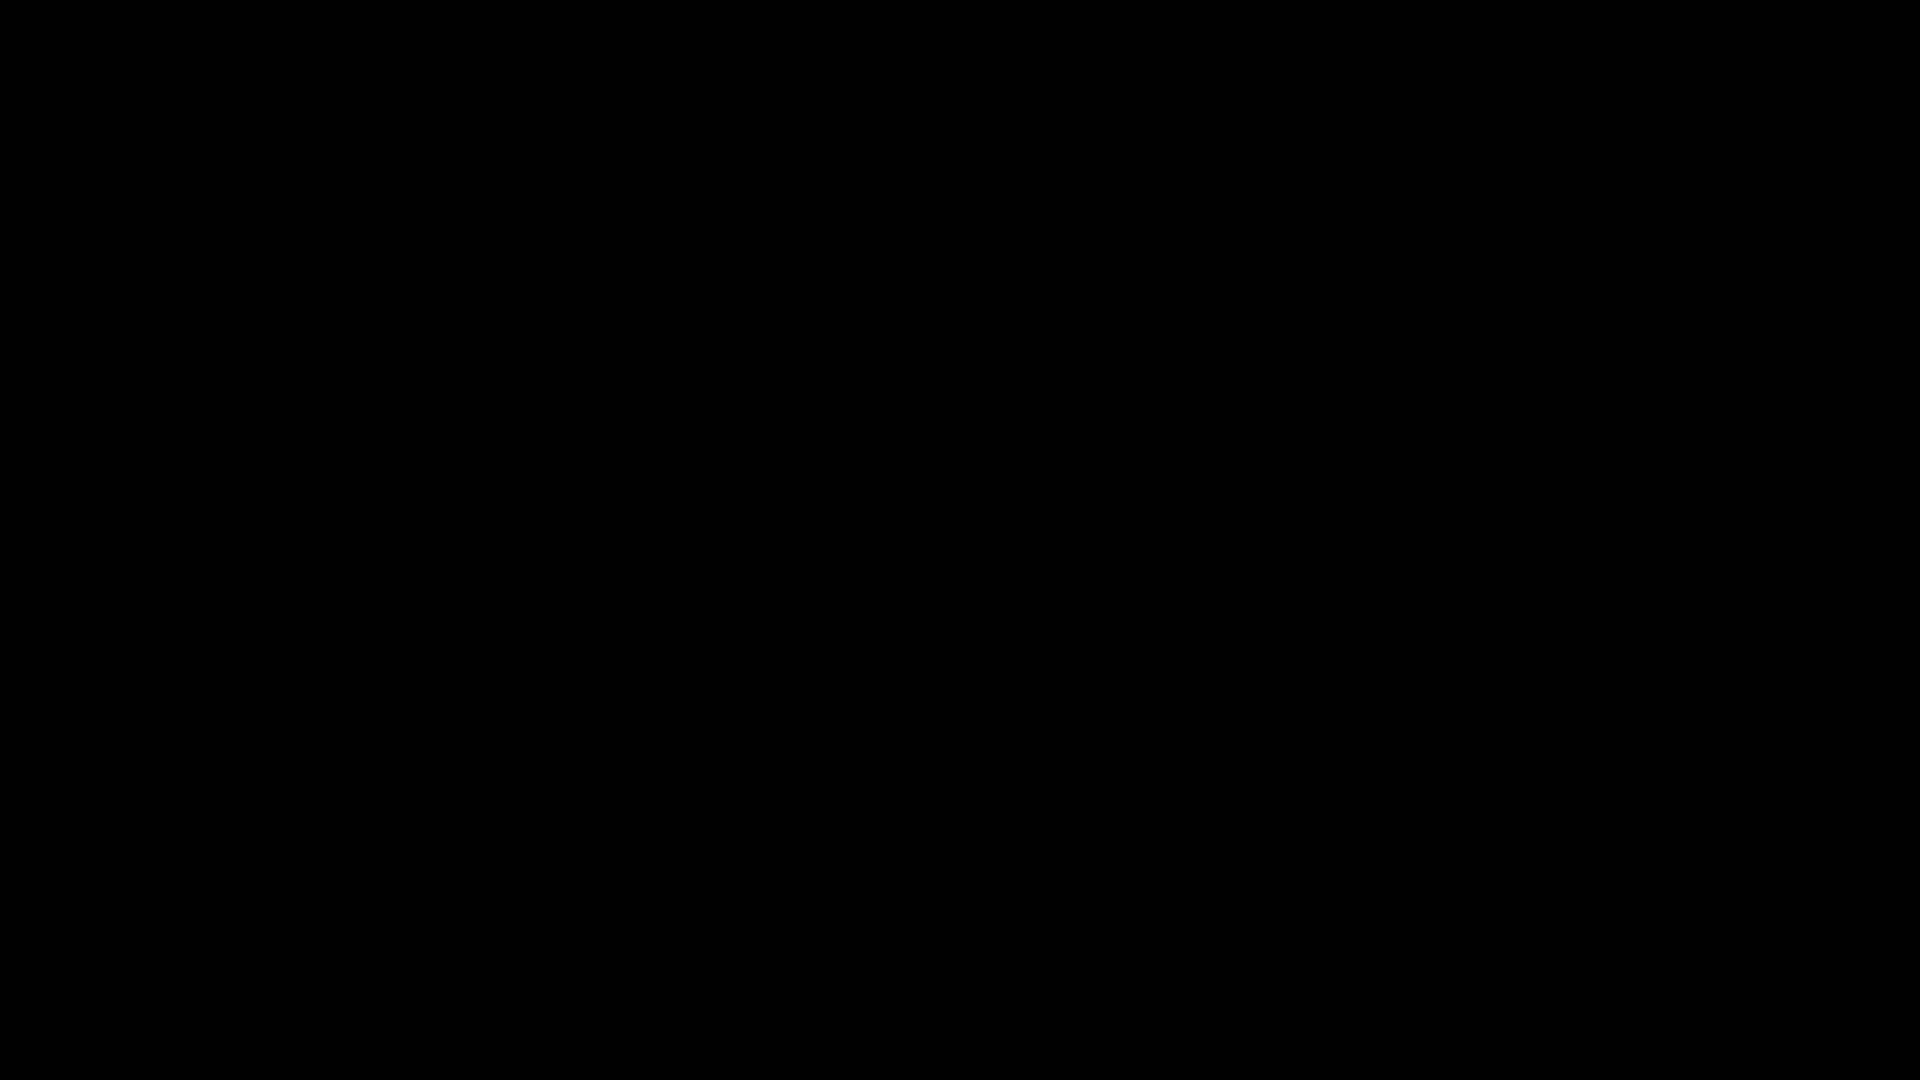

In [7]:
%%manim -i -qh -o func_example FunctionExample
import numpy as np

class FunctionExample(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-5, 5, .5],
            y_range=[-3, 4, 1],
            x_axis_config={"numbers_to_include": [-4, -3, 3, 4]},
            y_axis_config={"numbers_to_include": [-2, 2, 3]},
            tips=True
        )
        axes_labels=axes.get_axis_labels()
        # Get the graph of a simple functions
        graph = axes.get_graph(lambda x: np.sin(1/x), color=RED)
        # Set up its label
        graph_label = axes.get_graph_label(
            graph, x_val=1, direction=2 * UP + RIGHT,
           label=r'f(x) = \sin(\frac{1}{x})', color=DARK_BLUE
        )

        # Graph the axes components together
        axes_group = VGroup(axes, axes_labels)
        
        # Animate
        self.play(Create(axes_group), run_time=2)
        self.wait(0.25)
        self.play(Create(graph), run_time=3)
        self.play(Write(graph_label), run_time=2)

In [8]:
%%manim -qh -o lin_transform LinearTransformExample

class LinearTransformExample(LinearTransformationScene):
    def __init__(self):
        LinearTransformationScene.__init__(
            self,
            show_coordinates=True,
            leave_ghost_vectors=True,
        )
        
    def construct(self):
        # Create the matrix that does the transform
        matrix = [[3, 1], [4, 2]]
        self.apply_matrix(matrix)
        self.wait(2)

In [13]:
%%manim -qh -o threeDexample ThreeDSurface

class ThreeDSurface(ThreeDScene):
    def construct(self):
        res = 30
        self.set_camera_orientation(phi=50*DEGREES, theta=-30*DEGREES)
        
        def ripple(u, v):
            x = u
            y = v
            z = np.sin(10*(x**2 + y**2)) / 10
            return np.array([x, y, z])
        
        ripple_plane = ParametricSurface(
            ripple, resolution=(res, res),
            v_range=[-3, 3],
            u_range=[-3, 3],
            checkerboard_colors=None
        )
        # Set up the ripple plane
        ripple_plane.scale_about_point(1.5, ORIGIN)
        ripple_plane.set_style(fill_opacity=.5, stroke_color=ORANGE)
        # Create 3D axes
        axes = ThreeDAxes()
        # Animate
        self.add(axes)
        self.play(GrowFromCenter(ripple_plane), run_time=3)
        self.begin_ambient_camera_rotation()
        self.wait(20)
        self.stop_ambient_camera_rotation()

In [20]:
%%manim -qh -o non_lin_transform NonLinearTransform


class NonLinearTransform(Scene):
    def construct(self):
        # Create the grid and add it to screen
        grid = NumberPlane()
        self.add(grid)
        self.play(Create(grid, run_time=3, lag_ratio=.1))
        
        self.wait()
        
        grid.prepare_for_nonlinear_transform()
        # Transform
        self.play(
        grid.animate.apply_function(
                    lambda p: p + np.array([np.cos(p[1]), np.exp(2*np.sin(p[0]) + np.tan(p[0])), 0,]
                )
            ),
            run_time=3,
        )
        
        self.wait()